# 3. Evaluation

In [185]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [3]:
diabets = datasets.load_diabetes()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(diabets.data, diabets.target, test_size=0.25, random_state=42)
# 나눌필요없음 데이터전체로 하는게 더 정확

In [9]:
X = diabets.data
Y = diabets.target

In [10]:
model = KNeighborsRegressor(n_neighbors=10)

In [16]:
X.shape

(442, 10)

In [193]:
cross_val_score(model, X, Y, cv=10, scoring="neg_mean_squared_error")
# cv 가 test size를 나누는 수
# mean_squared_error가 작으면 작을수록 좋다~ 하지만 neg(-)를 붙이고 나서는 클수록 좋은 것으로 바뀌니까\
# score가 큰 순으로 모델이 더 정확하다고 볼 수 있음.

ValueError: Found input variables with inconsistent numbers of samples: [40, 6]

---------

In [21]:
iris = datasets.load_iris()

In [22]:
model = KNeighborsClassifier()

In [23]:
cross_val_score(model, iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

-----------

In [25]:
X =np.array([['N','Y'],['Y','Y'],['N','Y'],['Y','Y'],['Y','Y'],['Y','Y']])

In [26]:
Y =np.array(['cat','dog','cat','dog','dog','dog'])

In [27]:
kf = KFold(2) #반은 train , 반은 test

In [28]:
list(kf.split(X))

[(array([3, 4, 5]), array([0, 1, 2])), (array([0, 1, 2]), array([3, 4, 5]))]

In [31]:
for train_index, test_index in kf.split(X) :
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print("Train", train_index)
    print(x_train, '/', y_train)
    print("Test", test_index)
    print(x_test, '/', y_test)
    print('---------------------')

Train [3 4 5]
[['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['dog' 'dog' 'dog']
Test [0 1 2]
[['N' 'Y']
 ['Y' 'Y']
 ['N' 'Y']] / ['cat' 'dog' 'cat']
---------------------
Train [0 1 2]
[['N' 'Y']
 ['Y' 'Y']
 ['N' 'Y']] / ['cat' 'dog' 'cat']
Test [3 4 5]
[['Y' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['dog' 'dog' 'dog']
---------------------


In [33]:
skf = StratifiedKFold(2)

In [36]:
for train_index, test_index in skf.split(X, Y) : #인자가 Y가 더 들어감 Y를 가지고 나눌것이기 떄문에?
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    print("Train", train_index)
    print(x_train, '/', y_train)
    print("Test", test_index)
    print(x_test, '/', y_test)
    print('---------------------')

Train [2 4 5]
[['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['cat' 'dog' 'dog']
Test [0 1 3]
[['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['cat' 'dog' 'dog']
---------------------
Train [0 1 3]
[['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['cat' 'dog' 'dog']
Test [2 4 5]
[['N' 'Y']
 ['Y' 'Y']
 ['Y' 'Y']] / ['cat' 'dog' 'dog']
---------------------


-----------

In [38]:
lr = LinearRegression()

In [39]:
diabets = datasets.load_diabetes()

In [40]:
diabets

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [65]:
scores= []

for i in range(10) :
    #print(_)
    x_train, x_test, y_train, y_test = train_test_split(diabets.data, diabets.target, test_size=0.25, random_state=i)
    
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    
    score = mean_squared_error(y_test, preds)
    #print(score)
    scores.append(score)

In [66]:
scores

[3180.1988368427274,
 2903.100001322798,
 2933.1283490387764,
 3033.5111001601285,
 2923.9064741638276,
 3042.032415755347,
 3197.9172214559812,
 2962.940299678103,
 3108.04109825321,
 2386.87206069772]

In [67]:
df = pd.DataFrame({'RMSE' :np.sqrt(scores)})

In [68]:
df.T #10번 실행해서 출력된 RMSE값

,0,1,2,3,4,5,6,7,8,9
RMSE,56.393252,53.880423,54.158364,55.077319,54.073159,55.154623,56.55013,54.432897,55.749808,48.855625


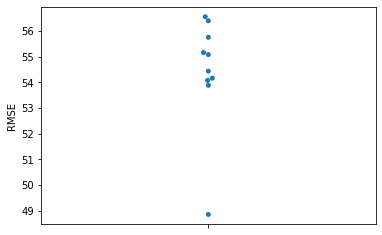

In [69]:
swarm = sns.swarmplot(y='RMSE', data=df) #분산이 꽤 크다.

In [70]:
scaler = MinMaxScaler()

In [71]:
X = scaler.fit_transform(diabets.data)

In [72]:
scores= []

for i in range(10) :
    #print(_)
    x_train, x_test, y_train, y_test = train_test_split(diabets.data, diabets.target, test_size=0.25)
    
    lr.fit(x_train, y_train)
    preds = lr.predict(x_test)
    
    score = mean_squared_error(y_test, preds)
    #print(score)
    scores.append(score)

In [73]:
scores

[3180.1988368427274,
 2903.100001322798,
 2933.1283490387764,
 3033.5111001601285,
 2923.9064741638276,
 3042.032415755347,
 3197.9172214559812,
 2962.940299678103,
 3108.04109825321,
 2386.87206069772]

In [76]:
df2 = pd.DataFrame({'RMSE' : np.sqrt(scores)})

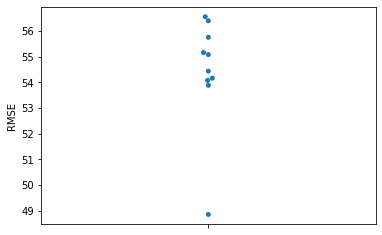

In [77]:
swarm = sns.swarmplot(y='RMSE', data=df2)

In [78]:
df['RMSE'].mean()

54.432559919877846

In [79]:
def tts_fit_score(model, X, Y, evaluation, test_size=0.25) : #fit_score를 구하는 함수 선언!
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=test_size)
    
    model.fit(x_train, y_train)
    preds = model.predict(x_test)

    score = evaluation(y_test, preds)
    return score

In [80]:
lr = LinearRegression()
diabets = datasets.load_diabetes()

In [82]:
scores = [tts_fit_score(lr, diabets.data, diabets.target, mean_squared_error) for _ in range(10)]

In [83]:
scores

[2410.437410952657,
 2700.5217033671565,
 3686.312346861883,
 3347.7213784024366,
 2927.346306429029,
 2868.5616203097907,
 3023.0471631427645,
 2882.760950609017,
 2819.066353492814,
 3140.0161819156624]

In [85]:
np.mean(np.sqrt(scores)) # 평균을 쓰는게 더 낫다. 왜냐, 이상치의 영향을 받을 필요성이 있다.

54.51054878470713

In [105]:
ss = ShuffleSplit(test_size=0.25, n_splits=10) # n_splits 의 의미 train_test 세트를 10개 세트로 나눈다// 
#test size 를 결국에 10개 나누라는 뜻

In [106]:
lr = LinearRegression()
diabets= datasets.load_diabetes()

In [107]:
scores = cross_val_score(lr, diabets.data, diabets.target, cv=ss, scoring='neg_mean_squared_error')

In [108]:
scores

array([-3627.87323923, -3228.28672001, -3283.5482615 , -3508.32462464,
       -2199.95082397, -3259.45717406, -3352.70337587, -3489.65133544,
       -2604.91406643, -3326.19293107])

In [109]:
df3 = pd.DataFrame({'RMSE': np.sqrt(-scores)})

In [111]:
df3.T

,0,1,2,3,4,5,6,7,8,9
RMSE,60.231829,56.818014,57.302254,59.231112,46.903633,57.091656,57.902533,59.073271,51.038359,57.673156


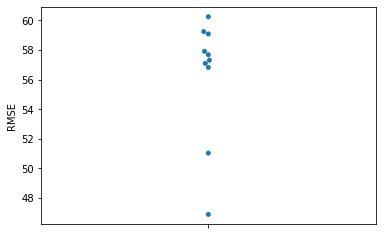

In [112]:
swarm = sns.swarmplot(y='RMSE', data=df3)

----------------------------

In [136]:
np.random.seed(1)

X = np.random.rand(40,1) **2 # 0에서 1사이의 균등 분포를 가진 40개를 뽑아서 제곱
y = (10- 1/(X.ravel()+0.1) ) + np.random.randn(40) #randn => 표준정규분포에서의 난수 40개 생성

In [137]:
X

array([[1.73907352e-01],
       [5.18867376e-01],
       [1.30815988e-08],
       [9.14049845e-02],
       [2.15372915e-02],
       [8.52641608e-03],
       [3.46928663e-02],
       [1.19412216e-01],
       [1.57424429e-01],
       [2.90323473e-01],
       [1.75724041e-01],
       [4.69525764e-01],
       [4.18007224e-02],
       [7.71090232e-01],
       [7.50080261e-04],
       [4.49526682e-01],
       [1.74143298e-01],
       [3.12134324e-01],
       [1.97084925e-02],
       [3.92442000e-02],
       [6.41191864e-01],
       [9.37530479e-01],
       [9.82347155e-02],
       [4.79310604e-01],
       [7.68057946e-01],
       [8.00321082e-01],
       [7.23251789e-03],
       [1.52527609e-03],
       [2.88423714e-02],
       [7.71134256e-01],
       [9.67209972e-03],
       [1.77331632e-01],
       [9.17552352e-01],
       [2.84265221e-01],
       [4.78693941e-01],
       [9.95501134e-02],
       [4.71283524e-01],
       [6.96600012e-01],
       [3.34461088e-04],
       [5.62716493e-01]])

In [138]:
y

array([ 7.24998644,  7.70041705, -0.12288892,  3.83970623,  1.50418461,
        1.31600899,  1.88404109,  5.0456151 ,  5.42819209,  6.59281674,
        5.70193919,  8.23148858,  1.8305394 ,  9.086429  ,  1.73425177,
        8.92229631,  6.16043712,  6.68597765,  0.8992155 ,  4.51082693,
        8.70162943,  8.39917725,  5.14639037, 10.37406543,  8.96816213,
        9.50648826,  0.9746409 , -0.20201375,  1.09605993,  8.50272859,
        0.67301646,  6.98083184,  9.856233  ,  8.32873282,  8.55755817,
        5.87386864,  7.49515774,  9.997533  ,  0.54626444,  8.1929663 ])

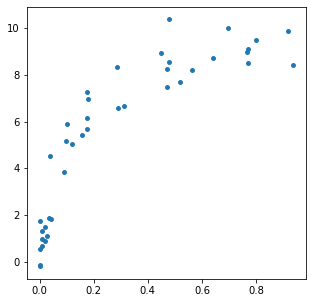

In [139]:
fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot()
ax.scatter(X.ravel(), y, s=15)

In [142]:
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1) #reshaoe을 안하면 1차원 reshape을 하면 2차원

In [143]:
X_test

array([[-1.00000000e-01],
       [-9.75951904e-02],
       [-9.51903808e-02],
       [-9.27855711e-02],
       [-9.03807615e-02],
       [-8.79759519e-02],
       [-8.55711423e-02],
       [-8.31663327e-02],
       [-8.07615230e-02],
       [-7.83567134e-02],
       [-7.59519038e-02],
       [-7.35470942e-02],
       [-7.11422846e-02],
       [-6.87374749e-02],
       [-6.63326653e-02],
       [-6.39278557e-02],
       [-6.15230461e-02],
       [-5.91182365e-02],
       [-5.67134269e-02],
       [-5.43086172e-02],
       [-5.19038076e-02],
       [-4.94989980e-02],
       [-4.70941884e-02],
       [-4.46893788e-02],
       [-4.22845691e-02],
       [-3.98797595e-02],
       [-3.74749499e-02],
       [-3.50701403e-02],
       [-3.26653307e-02],
       [-3.02605210e-02],
       [-2.78557114e-02],
       [-2.54509018e-02],
       [-2.30460922e-02],
       [-2.06412826e-02],
       [-1.82364729e-02],
       [-1.58316633e-02],
       [-1.34268537e-02],
       [-1.10220441e-02],
       [-8.6

In [155]:
poly2 = PolynomialFeatures(2) # 괄호안의 수만큼 변수를 늘려줌

In [156]:
X_poly2= poly2.fit_transform(X)

In [157]:
X[0]

array([0.17390735])

In [158]:
X_poly2[0]  # [ 1, X원본, X*2값]

array([1.        , 0.17390735, 0.03024377])

In [159]:
poly3 = PolynomialFeatures(3) 

In [161]:
X_poly3= poly3.fit_transform(X)

In [162]:
X_poly3[0]

array([1.        , 0.17390735, 0.03024377, 0.00525961])

In [163]:
lr= LinearRegression()

In [164]:
lr.fit(X_poly, y)

LinearRegression()

In [165]:
X_poly = poly.transform(X)
X_test_poly = poly.transform(X_test)

In [166]:
y_test = lr.predict(X_test_poly)

In [167]:
y_test

array([-1.34013187, -1.2698606 , -1.19981531, -1.12999599, -1.06040263,
       -0.99103525, -0.92189383, -0.85297838, -0.78428891, -0.7158254 ,
       -0.64758786, -0.57957629, -0.51179069, -0.44423105, -0.37689739,
       -0.3097897 , -0.24290797, -0.17625222, -0.10982243, -0.04361861,
        0.02235923,  0.08811111,  0.15363702,  0.21893696,  0.28401093,
        0.34885894,  0.41348097,  0.47787703,  0.54204713,  0.60599125,
        0.66970941,  0.7332016 ,  0.79646781,  0.85950806,  0.92232234,
        0.98491065,  1.04727299,  1.10940937,  1.17131977,  1.2330042 ,
        1.29446267,  1.35569516,  1.41670169,  1.47748225,  1.53803683,
        1.59836545,  1.6584681 ,  1.71834478,  1.77799549,  1.83742023,
        1.89661901,  1.95559181,  2.01433865,  2.07285951,  2.13115441,
        2.18922333,  2.24706629,  2.30468328,  2.3620743 ,  2.41923935,
        2.47617843,  2.53289154,  2.58937868,  2.64563986,  2.70167506,
        2.7574843 ,  2.81306756,  2.86842486,  2.92355619,  2.97

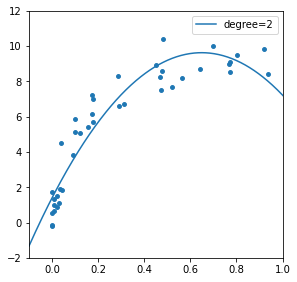

In [168]:
fig = plt.figure(figsize=(10,10))
ax= fig.add_subplot(2,2,2)
ax.scatter(X.ravel(), y, s=15)
ax.plot(X_test.ravel(), y_test, label='degree=2')
ax.set_xlim(-0.1, 1.0)
ax.set_ylim(-2, 12)
ax.legend(loc='best');

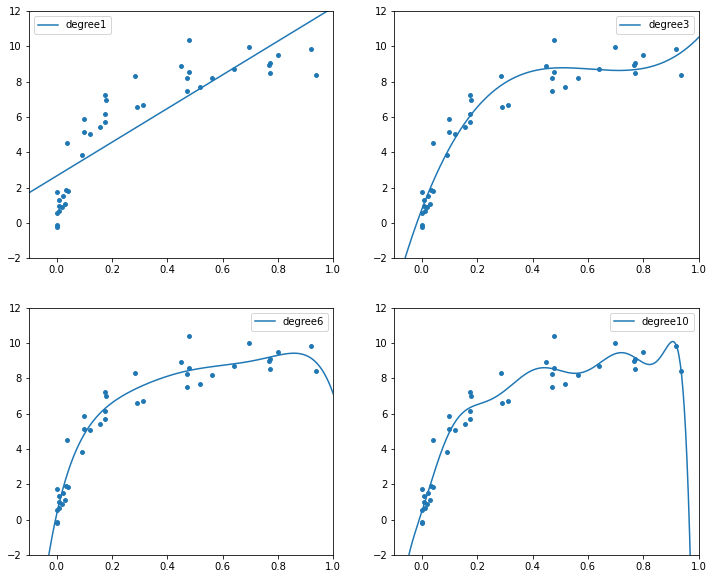

In [170]:
fig = plt.figure(figsize=(12,10))
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)
for i , degree in enumerate([1,3,6,10], start=1) :
    
    y_test=make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X,y).predict(X_test)
    #make pipeline으로 fit_transform 안하고도 전부다가능?
    
    ax= fig.add_subplot(2,2,i)
    ax.scatter(X.ravel(), y, s=15)
    ax.plot(X_test.ravel(), y_test, label='degree'+str(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc='best');

In [172]:
degree = np.arange(0, 21)

In [173]:
degree

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [174]:
model = make_pipeline(PolynomialFeatures(), LinearRegression())

In [179]:
train_score, test_score = validation_curve(model, X, y, param_name='polynomialfeatures__degree', \
                                           param_range=degree, cv=7) #cv 7은 데이터를 7등분

In [181]:
train_score #list 하나에 결괏값이 7개 (cv=7때문에) // list하나씩의 의미는 polynomial 차원 수치가 1, 2, 3, 총 20개

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.72060505, 0.73235327, 0.71615237, 0.75517775, 0.6979951 ,
        0.74351307, 0.71104367],
       [0.8966661 , 0.89427274, 0.88460403, 0.90482859, 0.87685741,
        0.90106431, 0.90420325],
       [0.92830604, 0.93586649, 0.93273606, 0.95501615, 0.91919623,
        0.92673491, 0.9402878 ],
       [0.9386132 , 0.94947024, 0.94775706, 0.9632512 , 0.93425141,
        0.94148127, 0.94641559],
       [0.94121068, 0.94988755, 0.94891078, 0.9637873 , 0.93481636,
        0.94464031, 0.94706837],
       [0.94280027, 0.95011515, 0.95028793, 0.96555698, 0.93622172,
        0.94504929, 0.94928043],
       [0.94465044, 0.95166164, 0.95034312, 0.96584535, 0.93731514,
        0.94571392, 0.95274503],
       [0.94465097, 0.95169173, 0.95126473, 0.96709791, 0.93735454,
        0.9484231 , 0.95274521],
       [0.94935834, 0.9537075 , 0.95317786, 0.96799601, 0.93964532,
        0.9490145 , 0.9

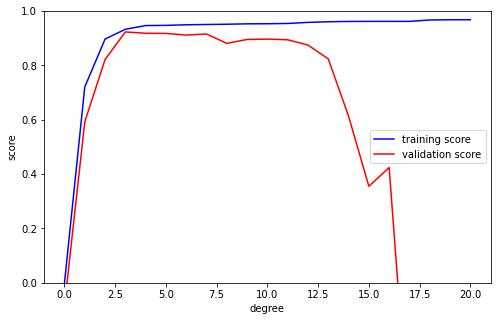

In [182]:
plt.figure(figsize=(8,5))
plt.plot(degree, np.median(train_score, 1), "b-", label="training score")
plt.plot(degree, np.median(test_score, 1), "r-", label="validation score")
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")
plt.legend(loc="best")

-----------------

In [187]:
np.linspace(0.1, 1, 25) #이걸 train size에 넣을거임

array([0.1   , 0.1375, 0.175 , 0.2125, 0.25  , 0.2875, 0.325 , 0.3625,
       0.4   , 0.4375, 0.475 , 0.5125, 0.55  , 0.5875, 0.625 , 0.6625,
       0.7   , 0.7375, 0.775 , 0.8125, 0.85  , 0.8875, 0.925 , 0.9625,
       1.    ])

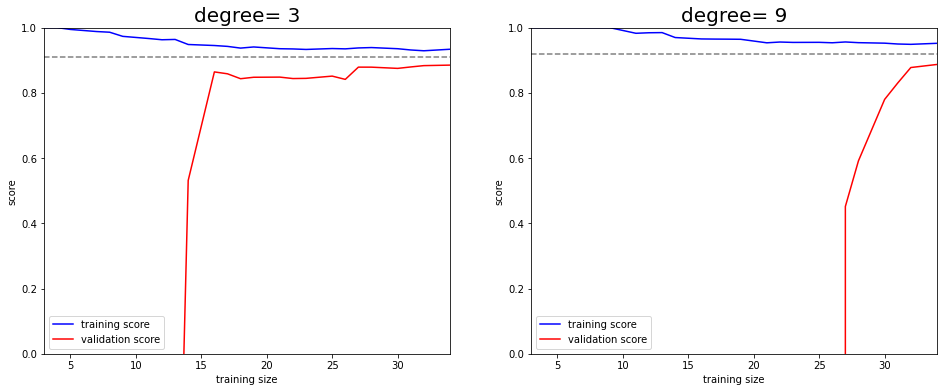

In [192]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
for i, degree in enumerate([3,9]) :
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    n, train_lc, test_lc = learning_curve(model, X, y, cv=7, train_sizes=np.linspace(0.1, 1, 25))
    ax[i].plot(n, np.mean(train_lc, 1), "b-", label="training score")
    ax[i].plot(n, np.mean(test_lc, 1), "r-", label="validation score")
    ax[i].hlines(np.mean([train_lc[-1], test_lc[-1]]), n[0], n[-1], color='gray', linestyle='dashed')
    ax[i].set(xlim=(n[0], n[-1]), ylim=(0,1), xlabel="training size", ylabel="score")
    ax[i].set_title("degree= {}".format(degree), size=20)
    ax[i].legend(loc='best');